In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# can generate keras model by Sequential API
# what is Sequential: DL layer를 순차적으로 쌓는 모델, 쉽게 딥러닝 모델을 만들 수 있다.
model = tf.keras.Sequential()

In [3]:
# add Dense layer to model
# e.g.
# model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(5))

# the first layer should include input_shape
# simple linear regression: y = wx + b (one input x) -> input_shape=[1]
NUM_OF_NODE=1
model.add(tf.keras.layers.Dense(NUM_OF_NODE, input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [4]:
# sgd (Stochastic Gradient Descent): 모델 내부의 weight에 대한 미분 값을 목적 함수 값이 낮아 지는 방향으로 차감하여, 
#                                    결국 최소 함수 값을 갖도록 하는 방법
# loss function: 데이터를 토대로 산출한 모델의 예측 값과 실제 값과의 차이를 표현하는 지표
# epochs: training 반복 횟수
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

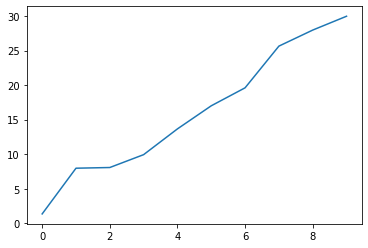

Epoch 1/100
1/1 [==============================] - 0s 215ms/step - loss: 388.1190 - mae: 17.1224
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 68.9409 - mae: 7.3493
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 13.7935 - mae: 3.2858
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 4.2608 - mae: 1.5955
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 2.6086 - mae: 1.0740
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 2.3180 - mae: 1.0649
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2626 - mae: 1.0872
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2480 - mae: 1.0958
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2404 - mae: 1.0987
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2341 - mae: 1.0993
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 

Epoch 89/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9213 - mae: 1.0305
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9189 - mae: 1.0298
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9165 - mae: 1.0291
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9141 - mae: 1.0284
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9118 - mae: 1.0277
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9094 - mae: 1.0271
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9071 - mae: 1.0264
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9049 - mae: 1.0257
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9026 - mae: 1.0250
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9004 - mae: 1.0244
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss

In [5]:
import random
import matplotlib.pyplot as plt

NUM_OF_INPUTS=10
# 3x + 5
x = np.arange(0, NUM_OF_INPUTS)
b = [5 * random.random() for i in range(0, NUM_OF_INPUTS)]

y = 3 * x + b

plt.plot(x, y)
plt.show()

history = model.fit(x, y, epochs=100)

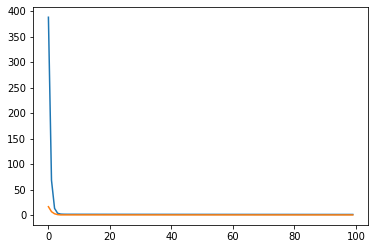

In [6]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.show()

In [7]:
# [mse, mae]
model.evaluate(x, y)

1/1 [==============================] - 0s 102ms/step - loss: 1.8939 - mae: 1.0224


[1.8938640356063843, 1.0223661661148071]

In [8]:
model.predict([5])

array([[17.519419]], dtype=float32)

In [9]:
import time

start_time = time.time()
prediction_result_by_num_of_input = {}
for num_inputs in range(7, 20):
    try:
        model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
        model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
        x = np.arange(0, num_inputs)
        y = 3 * x + 3
        model.fit(x, y, epochs=300)
        prediction_result_by_num_of_input[num_inputs] = model.predict([15])
    except Exception as e:
        print(num_inputs)
        raise e
end_time = time.time()

Epoch 1/300
1/1 [==============================] - 0s 180ms/step - loss: 254.2357 - mae: 14.1175
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 134.5171 - mae: 10.4046
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 71.4381 - mae: 7.7087
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 38.1991 - mae: 5.7510
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 20.6810 - mae: 4.3292
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 11.4453 - mae: 3.2962
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 6.5732 - mae: 2.5456
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 4.0000 - mae: 1.9999
Epoch 9/300
1/1 [==============================] - 0s 3ms/step - loss: 2.6382 - mae: 1.6029
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.9145 - mae: 1.3138
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 0.4456 - mae: 0.5560
Epoch 90/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4404 - mae: 0.5528
Epoch 91/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4353 - mae: 0.5495
Epoch 92/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4302 - mae: 0.5463
Epoch 93/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4252 - mae: 0.5431
Epoch 94/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4203 - mae: 0.5400
Epoch 95/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4154 - mae: 0.5368
Epoch 96/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4105 - mae: 0.5337
Epoch 97/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4058 - mae: 0.5306
Epoch 98/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4010 - mae: 0.5275
Epoch 99/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3964 - ma

1/1 [==============================] - 0s 2ms/step - loss: 0.1609 - mae: 0.3341
Epoch 177/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1591 - mae: 0.3322
Epoch 178/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1572 - mae: 0.3302
Epoch 179/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3283
Epoch 180/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1536 - mae: 0.3264
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1518 - mae: 0.3245
Epoch 182/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1500 - mae: 0.3226
Epoch 183/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1483 - mae: 0.3207
Epoch 184/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1465 - mae: 0.3189
Epoch 185/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1448 - mae: 0.3170
Epoch 186/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.2008
Epoch 264/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0574 - mae: 0.1996
Epoch 265/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0568 - mae: 0.1985
Epoch 266/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0561 - mae: 0.1973
Epoch 267/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0555 - mae: 0.1962
Epoch 268/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0548 - mae: 0.1950
Epoch 269/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0542 - mae: 0.1939
Epoch 270/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0535 - mae: 0.1927
Epoch 271/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0529 - mae: 0.1916
Epoch 272/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0523 - mae: 0.1905
Epoch 273/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.6766 - mae: 0.6806
Epoch 51/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6688 - mae: 0.6767
Epoch 52/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6611 - mae: 0.6728
Epoch 53/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6535 - mae: 0.6689
Epoch 54/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6460 - mae: 0.6651
Epoch 55/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6386 - mae: 0.6612
Epoch 56/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6313 - mae: 0.6574
Epoch 57/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6240 - mae: 0.6536
Epoch 58/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6168 - mae: 0.6499
Epoch 59/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6097 - mae: 0.6461
Epoch 60/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6027 - ma

1/1 [==============================] - 0s 2ms/step - loss: 0.2474 - mae: 0.4116
Epoch 138/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2446 - mae: 0.4092
Epoch 139/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2417 - mae: 0.4068
Epoch 140/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2390 - mae: 0.4045
Epoch 141/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2362 - mae: 0.4021
Epoch 142/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2335 - mae: 0.3998
Epoch 143/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2308 - mae: 0.3975
Epoch 144/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2282 - mae: 0.3952
Epoch 145/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2255 - mae: 0.3930
Epoch 146/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2229 - mae: 0.3907
Epoch 147/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0905 - mae: 0.2489
Epoch 225/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0894 - mae: 0.2474
Epoch 226/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0884 - mae: 0.2460
Epoch 227/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0874 - mae: 0.2446
Epoch 228/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0864 - mae: 0.2432
Epoch 229/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0854 - mae: 0.2418
Epoch 230/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0844 - mae: 0.2404
Epoch 231/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0834 - mae: 0.2390
Epoch 232/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0825 - mae: 0.2376
Epoch 233/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0815 - mae: 0.2362
Epoch 234/300
1/1 [==============================] - ETA: 0s - loss: 0.080

1/1 [==============================] - 0s 1ms/step - loss: 1.6357 - mae: 1.0635
Epoch 12/300
1/1 [==============================] - 0s 1ms/step - loss: 1.6166 - mae: 1.0589
Epoch 13/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5981 - mae: 1.0536
Epoch 14/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5799 - mae: 1.0480
Epoch 15/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5619 - mae: 1.0423
Epoch 16/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5442 - mae: 1.0364
Epoch 17/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5266 - mae: 1.0306
Epoch 18/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5092 - mae: 1.0247
Epoch 19/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4921 - mae: 1.0189
Epoch 20/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4751 - mae: 1.0131
Epoch 21/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4583 - ma

1/1 [==============================] - 0s 2ms/step - loss: 0.5976 - mae: 0.6448
Epoch 100/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5908 - mae: 0.6412
Epoch 101/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5841 - mae: 0.6375
Epoch 102/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5774 - mae: 0.6339
Epoch 103/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5709 - mae: 0.6303
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5644 - mae: 0.6267
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5580 - mae: 0.6231
Epoch 106/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5516 - mae: 0.6195
Epoch 107/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5453 - mae: 0.6160
Epoch 108/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5391 - mae: 0.6125
Epoch 109/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.2209 - mae: 0.3921
Epoch 187/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2184 - mae: 0.3898
Epoch 188/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2159 - mae: 0.3876
Epoch 189/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2135 - mae: 0.3854
Epoch 190/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2110 - mae: 0.3832
Epoch 191/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2086 - mae: 0.3810
Epoch 192/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2063 - mae: 0.3789
Epoch 193/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2039 - mae: 0.3767
Epoch 194/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2016 - mae: 0.3746
Epoch 195/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1993 - mae: 0.3724
Epoch 196/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0817 - mae: 0.2384
Epoch 274/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0807 - mae: 0.2370
Epoch 275/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0798 - mae: 0.2357
Epoch 276/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0789 - mae: 0.2343
Epoch 277/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0780 - mae: 0.2330
Epoch 278/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0771 - mae: 0.2317
Epoch 279/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0763 - mae: 0.2304
Epoch 280/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0754 - mae: 0.2290
Epoch 281/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0745 - mae: 0.2277
Epoch 282/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0737 - mae: 0.2264
Epoch 283/300
1/1 [==============================] - 0s 1ms/step - loss: 0

Epoch 61/300
1/1 [==============================] - 0s 1ms/step - loss: 0.8167 - mae: 0.7521
Epoch 62/300
1/1 [==============================] - 0s 2ms/step - loss: 0.8075 - mae: 0.7479
Epoch 63/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7984 - mae: 0.7437
Epoch 64/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7894 - mae: 0.7395
Epoch 65/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7805 - mae: 0.7353
Epoch 66/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7717 - mae: 0.7311
Epoch 67/300
1/1 [==============================] - 0s 2ms/step - loss: 0.7630 - mae: 0.7270
Epoch 68/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7544 - mae: 0.7229
Epoch 69/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7459 - mae: 0.7188
Epoch 70/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7375 - mae: 0.7148
Epoch 71/300
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 0.3049 - mae: 0.4595
Epoch 149/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3014 - mae: 0.4569
Epoch 150/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2980 - mae: 0.4544
Epoch 151/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2947 - mae: 0.4518
Epoch 152/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2913 - mae: 0.4492
Epoch 153/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2881 - mae: 0.4467
Epoch 154/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2848 - mae: 0.4442
Epoch 155/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2816 - mae: 0.4417
Epoch 156/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2784 - mae: 0.4392
Epoch 157/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2753 - mae: 0.4367
Epoch 158/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.1138 - mae: 0.2808
Epoch 236/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1125 - mae: 0.2792
Epoch 237/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1112 - mae: 0.2776
Epoch 238/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1100 - mae: 0.2760
Epoch 239/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1088 - mae: 0.2745
Epoch 240/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1075 - mae: 0.2729
Epoch 241/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1063 - mae: 0.2714
Epoch 242/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1051 - mae: 0.2698
Epoch 243/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1039 - mae: 0.2683
Epoch 244/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1028 - mae: 0.2668
Epoch 245/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 1.6546 - mae: 1.0658
Epoch 15/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6362 - mae: 1.0598
Epoch 16/300
1/1 [==============================] - 0s 2ms/step - loss: 1.6179 - mae: 1.0539
Epoch 17/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5998 - mae: 1.0480
Epoch 18/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5820 - mae: 1.0421
Epoch 19/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5643 - mae: 1.0363
Epoch 20/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5468 - mae: 1.0305
Epoch 21/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5295 - mae: 1.0247
Epoch 22/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5125 - mae: 1.0190
Epoch 23/300
1/1 [==============================] - 0s 2ms/step - loss: 1.4956 - mae: 1.0133
Epoch 24/300
1/1 [==============================] - 0s 2ms/step - loss: 1.4789 - ma

1/1 [==============================] - 0s 1ms/step - loss: 0.6159 - mae: 0.6503
Epoch 103/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6090 - mae: 0.6466
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6022 - mae: 0.6430
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5955 - mae: 0.6394
Epoch 106/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5889 - mae: 0.6358
Epoch 107/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5823 - mae: 0.6323
Epoch 108/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5758 - mae: 0.6287
Epoch 109/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5694 - mae: 0.6252
Epoch 110/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5630 - mae: 0.6217
Epoch 111/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5567 - mae: 0.6182
Epoch 112/300
1/1 [==============================] - 0s 3ms/step - loss: 0

1/1 [==============================] - 0s 3ms/step - loss: 0.2319 - mae: 0.3990
Epoch 190/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2293 - mae: 0.3967
Epoch 191/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2267 - mae: 0.3945
Epoch 192/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2242 - mae: 0.3923
Epoch 193/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2217 - mae: 0.3901
Epoch 194/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2192 - mae: 0.3879
Epoch 195/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2168 - mae: 0.3858
Epoch 196/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2143 - mae: 0.3836
Epoch 197/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2119 - mae: 0.3814
Epoch 198/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2096 - mae: 0.3793
Epoch 199/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0883 - mae: 0.2462
Epoch 276/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0873 - mae: 0.2448
Epoch 277/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0863 - mae: 0.2434
Epoch 278/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mae: 0.2421
Epoch 279/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0844 - mae: 0.2407
Epoch 280/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0834 - mae: 0.2394
Epoch 281/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0825 - mae: 0.2380
Epoch 282/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0816 - mae: 0.2367
Epoch 283/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0807 - mae: 0.2354
Epoch 284/300
1/1 [==============================] - 0s 1ms/step - loss: 0.0798 - mae: 0.2340
Epoch 285/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.9976 - mae: 0.8318
Epoch 56/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9865 - mae: 0.8272
Epoch 57/300
1/1 [==============================] - 0s 2ms/step - loss: 0.9756 - mae: 0.8226
Epoch 58/300
1/1 [==============================] - 0s 2ms/step - loss: 0.9648 - mae: 0.8180
Epoch 59/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9541 - mae: 0.8135
Epoch 60/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9435 - mae: 0.8089
Epoch 61/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9330 - mae: 0.8044
Epoch 62/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9227 - mae: 0.8000
Epoch 63/300
1/1 [==============================] - 0s 1ms/step - loss: 0.9125 - mae: 0.7955
Epoch 64/300
1/1 [==============================] - 0s 2ms/step - loss: 0.9024 - mae: 0.7911
Epoch 65/300
1/1 [==============================] - 0s 1ms/step - loss: 0.8924 - ma

1/1 [==============================] - 0s 2ms/step - loss: 0.3783 - mae: 0.5122
Epoch 143/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3741 - mae: 0.5094
Epoch 144/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3700 - mae: 0.5065
Epoch 145/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3659 - mae: 0.5037
Epoch 146/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3618 - mae: 0.5009
Epoch 147/300
1/1 [==============================] - 0s 3ms/step - loss: 0.3578 - mae: 0.4982
Epoch 148/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3538 - mae: 0.4954
Epoch 149/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3499 - mae: 0.4926
Epoch 150/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3460 - mae: 0.4899
Epoch 151/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3422 - mae: 0.4872
Epoch 152/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.1435 - mae: 0.3154
Epoch 230/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1419 - mae: 0.3137
Epoch 231/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1403 - mae: 0.3119
Epoch 232/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1387 - mae: 0.3102
Epoch 233/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1372 - mae: 0.3085
Epoch 234/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1357 - mae: 0.3068
Epoch 235/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1342 - mae: 0.3051
Epoch 236/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1327 - mae: 0.3034
Epoch 237/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1312 - mae: 0.3017
Epoch 238/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1298 - mae: 0.3000
Epoch 239/300
1/1 [==============================] - 0s 1ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 1.6076 - mae: 1.0550
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5899 - mae: 1.0492
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5723 - mae: 1.0434
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5550 - mae: 1.0376
Epoch 12/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5379 - mae: 1.0319
Epoch 13/300
1/1 [==============================] - 0s 2ms/step - loss: 1.5210 - mae: 1.0262
Epoch 14/300
1/1 [==============================] - 0s 1ms/step - loss: 1.5042 - mae: 1.0205
Epoch 15/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4877 - mae: 1.0149
Epoch 16/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4713 - mae: 1.0093
Epoch 17/300
1/1 [==============================] - 0s 1ms/step - loss: 1.4551 - mae: 1.0037
Epoch 18/300
1/1 [==============================] - 0s 2ms/step - loss: 1.4391 - mae

1/1 [==============================] - 0s 2ms/step - loss: 0.6068 - mae: 0.6482
Epoch 97/300
1/1 [==============================] - 0s 3ms/step - loss: 0.6001 - mae: 0.6446
Epoch 98/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5935 - mae: 0.6410
Epoch 99/300
1/1 [==============================] - 0s 3ms/step - loss: 0.5870 - mae: 0.6375
Epoch 100/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5805 - mae: 0.6340
Epoch 101/300
1/1 [==============================] - 0s 1ms/step - loss: 0.5741 - mae: 0.6305
Epoch 102/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5678 - mae: 0.6270
Epoch 103/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5616 - mae: 0.6235
Epoch 104/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5554 - mae: 0.6201
Epoch 105/300
1/1 [==============================] - 0s 2ms/step - loss: 0.5493 - mae: 0.6167
Epoch 106/300
1/1 [==============================] - 0s 2ms/step - loss: 0.54

1/1 [==============================] - 0s 1ms/step - loss: 0.2342 - mae: 0.4027
Epoch 183/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2316 - mae: 0.4004
Epoch 184/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2291 - mae: 0.3982
Epoch 185/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2265 - mae: 0.3960
Epoch 186/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2241 - mae: 0.3939
Epoch 187/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2216 - mae: 0.3917
Epoch 188/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2191 - mae: 0.3895
Epoch 189/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2167 - mae: 0.3874
Epoch 190/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2143 - mae: 0.3852
Epoch 191/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2120 - mae: 0.3831
Epoch 192/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0894 - mae: 0.2488
Epoch 270/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0884 - mae: 0.2474
Epoch 271/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0874 - mae: 0.2460
Epoch 272/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0865 - mae: 0.2447
Epoch 273/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0855 - mae: 0.2433
Epoch 274/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0846 - mae: 0.2420
Epoch 275/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0836 - mae: 0.2406
Epoch 276/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0827 - mae: 0.2393
Epoch 277/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0818 - mae: 0.2380
Epoch 278/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0809 - mae: 0.2367
Epoch 279/300
1/1 [==============================] - 0s 3ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 1.2978 - mae: 0.9450
Epoch 50/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2836 - mae: 0.9398
Epoch 51/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2695 - mae: 0.9347
Epoch 52/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2556 - mae: 0.9295
Epoch 53/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2419 - mae: 0.9244
Epoch 54/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2283 - mae: 0.9194
Epoch 55/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2148 - mae: 0.9143
Epoch 56/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2015 - mae: 0.9093
Epoch 57/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1884 - mae: 0.9043
Epoch 58/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1754 - mae: 0.8993
Epoch 59/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1625 - ma

1/1 [==============================] - 0s 1ms/step - loss: 0.4982 - mae: 0.5855
Epoch 137/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4927 - mae: 0.5823
Epoch 138/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4873 - mae: 0.5791
Epoch 139/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4820 - mae: 0.5759
Epoch 140/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4767 - mae: 0.5728
Epoch 141/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4715 - mae: 0.5696
Epoch 142/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4663 - mae: 0.5665
Epoch 143/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4612 - mae: 0.5634
Epoch 144/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4562 - mae: 0.5603
Epoch 145/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4512 - mae: 0.5572
Epoch 146/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.1912 - mae: 0.3628
Epoch 224/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1891 - mae: 0.3608
Epoch 225/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1871 - mae: 0.3588
Epoch 226/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1850 - mae: 0.3568
Epoch 227/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1830 - mae: 0.3549
Epoch 228/300
1/1 [==============================] - 0s 4ms/step - loss: 0.1810 - mae: 0.3529
Epoch 229/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1790 - mae: 0.3510
Epoch 230/300
1/1 [==============================] - 0s 4ms/step - loss: 0.1771 - mae: 0.3491
Epoch 231/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1751 - mae: 0.3471
Epoch 232/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1732 - mae: 0.3452
Epoch 233/300
1/1 [==============================] - 0s 6ms/step - loss: 0

1/1 [==============================] - 0s 211ms/step - loss: 644.9819 - mae: 22.3974
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 88.9823 - mae: 7.7357
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 13.7195 - mae: 3.6563
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 3.5158 - mae: 1.6143
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 2.1168 - mae: 1.1922
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 1.9096 - mae: 1.1635
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.8639 - mae: 1.1279
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 1.8402 - mae: 1.1317
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 1.8197 - mae: 1.1219
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 1.7999 - mae: 1.1171
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - loss: 1.7803 - mae

1/1 [==============================] - 0s 3ms/step - loss: 0.7580 - mae: 0.7247
Epoch 90/300
1/1 [==============================] - 0s 3ms/step - loss: 0.7497 - mae: 0.7207
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 0.7416 - mae: 0.7168
Epoch 92/300
1/1 [==============================] - 0s 4ms/step - loss: 0.7335 - mae: 0.7129
Epoch 93/300
1/1 [==============================] - 0s 6ms/step - loss: 0.7255 - mae: 0.7090
Epoch 94/300
1/1 [==============================] - 0s 5ms/step - loss: 0.7176 - mae: 0.7051
Epoch 95/300
1/1 [==============================] - 0s 5ms/step - loss: 0.7098 - mae: 0.7013
Epoch 96/300
1/1 [==============================] - 0s 2ms/step - loss: 0.7021 - mae: 0.6974
Epoch 97/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6944 - mae: 0.6936
Epoch 98/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6869 - mae: 0.6899
Epoch 99/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6794 - ma

1/1 [==============================] - 0s 2ms/step - loss: 0.2924 - mae: 0.4501
Epoch 177/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2893 - mae: 0.4477
Epoch 178/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2861 - mae: 0.4452
Epoch 179/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2830 - mae: 0.4428
Epoch 180/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2799 - mae: 0.4404
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2769 - mae: 0.4380
Epoch 182/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2738 - mae: 0.4356
Epoch 183/300
1/1 [==============================] - 0s 4ms/step - loss: 0.2709 - mae: 0.4332
Epoch 184/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2679 - mae: 0.4308
Epoch 185/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2650 - mae: 0.4285
Epoch 186/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.1128 - mae: 0.2796
Epoch 264/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1116 - mae: 0.2781
Epoch 265/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1104 - mae: 0.2766
Epoch 266/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1092 - mae: 0.2750
Epoch 267/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1080 - mae: 0.2735
Epoch 268/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1068 - mae: 0.2720
Epoch 269/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1057 - mae: 0.2706
Epoch 270/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1045 - mae: 0.2691
Epoch 271/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1034 - mae: 0.2676
Epoch 272/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1022 - mae: 0.2662
Epoch 273/300
1/1 [==============================] - 0s 3ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 1.2641 - mae: 0.9355
Epoch 43/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2504 - mae: 0.9304
Epoch 44/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2369 - mae: 0.9254
Epoch 45/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2235 - mae: 0.9203
Epoch 46/300
1/1 [==============================] - 0s 1ms/step - loss: 1.2102 - mae: 0.9153
Epoch 47/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1971 - mae: 0.9104
Epoch 48/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1841 - mae: 0.9054
Epoch 49/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1713 - mae: 0.9005
Epoch 50/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1586 - mae: 0.8956
Epoch 51/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1460 - mae: 0.8907
Epoch 52/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1336 - ma

1/1 [==============================] - 0s 2ms/step - loss: 0.4899 - mae: 0.5824
Epoch 130/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4846 - mae: 0.5792
Epoch 131/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4794 - mae: 0.5761
Epoch 132/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4742 - mae: 0.5729
Epoch 133/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4690 - mae: 0.5698
Epoch 134/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4639 - mae: 0.5667
Epoch 135/300
1/1 [==============================] - 0s 2ms/step - loss: 0.4589 - mae: 0.5637
Epoch 136/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4539 - mae: 0.5606
Epoch 137/300
1/1 [==============================] - 0s 3ms/step - loss: 0.4490 - mae: 0.5575
Epoch 138/300
1/1 [==============================] - 0s 1ms/step - loss: 0.4442 - mae: 0.5545
Epoch 139/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.1899 - mae: 0.3626
Epoch 217/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1878 - mae: 0.3606
Epoch 218/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1858 - mae: 0.3586
Epoch 219/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1838 - mae: 0.3567
Epoch 220/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1818 - mae: 0.3547
Epoch 221/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1798 - mae: 0.3528
Epoch 222/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1779 - mae: 0.3509
Epoch 223/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1759 - mae: 0.3490
Epoch 224/300
1/1 [==============================] - 0s 1ms/step - loss: 0.1740 - mae: 0.3471
Epoch 225/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1721 - mae: 0.3452
Epoch 226/300
1/1 [==============================] - 0s 1ms/step - loss: 0

Epoch 1/300
1/1 [==============================] - 0s 155ms/step - loss: 549.7620 - mae: 20.7692
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 330.6688 - mae: 15.1130
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 199.2062 - mae: 12.7534
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 120.3214 - mae: 9.0184
Epoch 5/300
1/1 [==============================] - 0s 1ms/step - loss: 72.9826 - mae: 7.9408
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 44.5712 - mae: 5.4521
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 27.5162 - mae: 5.0502
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 17.2751 - mae: 3.4022
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 11.1222 - mae: 3.3128
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 7.4224 - mae: 2.2804
Epoch 11/300
1/1 [==============================] - 0s 1ms/st

Epoch 89/300
1/1 [==============================] - 0s 2ms/step - loss: 0.8081 - mae: 0.7463
Epoch 90/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7994 - mae: 0.7423
Epoch 91/300
1/1 [==============================] - 0s 1ms/step - loss: 0.7907 - mae: 0.7383
Epoch 92/300
1/1 [==============================] - 0s 2ms/step - loss: 0.7822 - mae: 0.7343
Epoch 93/300
1/1 [==============================] - 0s 2ms/step - loss: 0.7738 - mae: 0.7303
Epoch 94/300
1/1 [==============================] - 0s 2ms/step - loss: 0.7654 - mae: 0.7264
Epoch 95/300
1/1 [==============================] - 0s 3ms/step - loss: 0.7572 - mae: 0.7224
Epoch 96/300
1/1 [==============================] - 0s 3ms/step - loss: 0.7490 - mae: 0.7185
Epoch 97/300
1/1 [==============================] - 0s 3ms/step - loss: 0.7409 - mae: 0.7146
Epoch 98/300
1/1 [==============================] - 0s 2ms/step - loss: 0.7329 - mae: 0.7108
Epoch 99/300
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 0.3144 - mae: 0.4656
Epoch 177/300
1/1 [==============================] - 0s 1ms/step - loss: 0.3111 - mae: 0.4630
Epoch 178/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3077 - mae: 0.4605
Epoch 179/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3044 - mae: 0.4580
Epoch 180/300
1/1 [==============================] - 0s 2ms/step - loss: 0.3011 - mae: 0.4556
Epoch 181/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2978 - mae: 0.4531
Epoch 182/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2946 - mae: 0.4507
Epoch 183/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2915 - mae: 0.4482
Epoch 184/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2883 - mae: 0.4458
Epoch 185/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2852 - mae: 0.4434
Epoch 186/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.1224 - mae: 0.2904
Epoch 264/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1210 - mae: 0.2888
Epoch 265/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1197 - mae: 0.2873
Epoch 266/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1184 - mae: 0.2857
Epoch 267/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1172 - mae: 0.2842
Epoch 268/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1159 - mae: 0.2826
Epoch 269/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1147 - mae: 0.2811
Epoch 270/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1134 - mae: 0.2796
Epoch 271/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1122 - mae: 0.2781
Epoch 272/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1110 - mae: 0.2766
Epoch 273/300
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 1ms/step - loss: 1372.4376 - mae: 32.2694
Epoch 42/300
1/1 [==============================] - 0s 2ms/step - loss: 1366.7927 - mae: 31.2557
Epoch 43/300
1/1 [==============================] - 0s 2ms/step - loss: 1361.1708 - mae: 32.1330
Epoch 44/300
1/1 [==============================] - 0s 1ms/step - loss: 1355.5724 - mae: 31.1296
Epoch 45/300
1/1 [==============================] - 0s 1ms/step - loss: 1349.9972 - mae: 31.9973
Epoch 46/300
1/1 [==============================] - 0s 1ms/step - loss: 1344.4446 - mae: 31.0040
Epoch 47/300
1/1 [==============================] - 0s 2ms/step - loss: 1338.9156 - mae: 31.8621
Epoch 48/300
1/1 [==============================] - 0s 1ms/step - loss: 1333.4094 - mae: 30.8788
Epoch 49/300
1/1 [==============================] - 0s 2ms/step - loss: 1327.9252 - mae: 31.7276
Epoch 50/300
1/1 [==============================] - 0s 1ms/step - loss: 1322.4642 - mae: 30.7542
Epoch 51/300
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 970.9373 - mae: 27.0284
Epoch 126/300
1/1 [==============================] - 0s 2ms/step - loss: 966.9465 - mae: 26.3639
Epoch 127/300
1/1 [==============================] - 0s 2ms/step - loss: 962.9725 - mae: 26.9150
Epoch 128/300
1/1 [==============================] - 0s 2ms/step - loss: 959.0137 - mae: 26.2570
Epoch 129/300
1/1 [==============================] - 0s 1ms/step - loss: 955.0720 - mae: 26.8020
Epoch 130/300
1/1 [==============================] - 0s 1ms/step - loss: 951.1462 - mae: 26.1506
Epoch 131/300
1/1 [==============================] - 0s 1ms/step - loss: 947.2366 - mae: 26.6895
Epoch 132/300
1/1 [==============================] - 0s 1ms/step - loss: 943.3433 - mae: 26.0446
Epoch 133/300
1/1 [==============================] - 0s 2ms/step - loss: 939.4656 - mae: 26.5776
Epoch 134/300
1/1 [==============================] - 0s 1ms/step - loss: 935.6041 - mae: 25.9390
Epoch 135/300
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 687.0130 - mae: 22.6627
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 684.1904 - mae: 22.2232
Epoch 211/300
1/1 [==============================] - 0s 1ms/step - loss: 681.3796 - mae: 22.5681
Epoch 212/300
1/1 [==============================] - 0s 2ms/step - loss: 678.5800 - mae: 22.1329
Epoch 213/300
1/1 [==============================] - 0s 2ms/step - loss: 675.7919 - mae: 22.4739
Epoch 214/300
1/1 [==============================] - 0s 2ms/step - loss: 673.0151 - mae: 22.0429
Epoch 215/300
1/1 [==============================] - 0s 2ms/step - loss: 670.2498 - mae: 22.3801
Epoch 216/300
1/1 [==============================] - 0s 2ms/step - loss: 667.4957 - mae: 21.9532
Epoch 217/300
1/1 [==============================] - 0s 2ms/step - loss: 664.7529 - mae: 22.2866
Epoch 218/300
1/1 [==============================] - 0s 2ms/step - loss: 662.0214 - mae: 21.8639
Epoch 219/300
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 486.1597 - mae: 19.0175
Epoch 294/300
1/1 [==============================] - 0s 1ms/step - loss: 484.1625 - mae: 18.7237
Epoch 295/300
1/1 [==============================] - 0s 2ms/step - loss: 482.1735 - mae: 18.9384
Epoch 296/300
1/1 [==============================] - 0s 2ms/step - loss: 480.1927 - mae: 18.6474
Epoch 297/300
1/1 [==============================] - 0s 2ms/step - loss: 478.2199 - mae: 18.8596
Epoch 298/300
1/1 [==============================] - 0s 4ms/step - loss: 476.2556 - mae: 18.5714
Epoch 299/300
1/1 [==============================] - 0s 2ms/step - loss: 474.2994 - mae: 18.7812
Epoch 300/300
1/1 [==============================] - 0s 2ms/step - loss: 472.3511 - mae: 18.4957
Epoch 1/300
1/1 [==============================] - 0s 184ms/step - loss: 660.5787 - mae: 22.7258
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 1005.7909 - mae: 26.6480
Epoch 3/300
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 224990469292032.0000 - mae: 12844328.0000
Epoch 65/300
1/1 [==============================] - 0s 3ms/step - loss: 342955453841408.0000 - mae: 15857992.0000
Epoch 66/300
1/1 [==============================] - 0s 1ms/step - loss: 522770802802688.0000 - mae: 19578752.0000
Epoch 67/300
1/1 [==============================] - 0s 2ms/step - loss: 796865549303808.0000 - mae: 24172520.0000
Epoch 68/300
1/1 [==============================] - 0s 2ms/step - loss: 1214671780577280.0000 - mae: 29844122.0000
Epoch 69/300
1/1 [==============================] - 0s 3ms/step - loss: 1851538658033664.0000 - mae: 36846464.0000
Epoch 70/300
1/1 [==============================] - 0s 2ms/step - loss: 2822320989143040.0000 - mae: 45491740.0000
Epoch 71/300
1/1 [==============================] - 0s 2ms/step - loss: 4302092378308608.0000 - mae: 56165452.0000
Epoch 72/300
1/1 [==============================] - 0s 3ms/step - loss: 6557728403095552.0000 - m

1/1 [==============================] - 0s 1ms/step - loss: 272284567852539438553890816.0000 - mae: 14129959010304.0000
Epoch 131/300
1/1 [==============================] - 0s 1ms/step - loss: 415046244528730945913618432.0000 - mae: 17445264818176.0000
Epoch 132/300
1/1 [==============================] - 0s 1ms/step - loss: 632659717354671469894828032.0000 - mae: 21538449391616.0000
Epoch 133/300
1/1 [==============================] - 0s 1ms/step - loss: 964370249879737344465043456.0000 - mae: 26592017383424.0000
Epoch 134/300
1/1 [==============================] - 0s 1ms/step - loss: 1469999489436836075522752512.0000 - mae: 32831292047360.0000
Epoch 135/300
1/1 [==============================] - 0s 2ms/step - loss: 2240737070679943460526489600.0000 - mae: 40534504636416.0000
Epoch 136/300
1/1 [==============================] - 0s 2ms/step - loss: 3415580833517939457343356928.0000 - mae: 50045109927936.0000
Epoch 137/300
1/1 [==============================] - 0s 2ms/step - loss: 5206404

1/1 [==============================] - 0s 2ms/step - loss: 11305583710605271448818596928351633408.0000 - mae: 2879227053104693248.0000
Epoch 189/300
1/1 [==============================] - 0s 2ms/step - loss: 17233224399922891301486906839759060992.0000 - mae: 3554779091838173184.0000
Epoch 190/300
1/1 [==============================] - 0s 3ms/step - loss: inf - mae: 4388836451953934336.0000
Epoch 191/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 5418589564505686016.0000
Epoch 192/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 6689952660679819264.0000
Epoch 193/300
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 8259615460492836864.0000
Epoch 194/300
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 10197567926366633984.0000
Epoch 195/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 12590221776639754240.0000
Epoch 196/300
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 11218249057845910993633280.0000
Epoch 261/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 13850383840842902528851968.0000
Epoch 262/300
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 17100100627448129963163648.0000
Epoch 263/300
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 21112291674831554183430144.0000
Epoch 264/300
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 26065862730392047275999232.0000
Epoch 265/300
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: 32181700872275730446155776.0000
Epoch 266/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 39732492788909205926969344.0000
Epoch 267/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 49054923841439802027147264.0000
Epoch 268/300
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: 60

In [10]:
print(f'''training durations: {end_time - start_time}sec''')
for key in range(7, 20):
    print(f'''num of inputs: {key}, - result: {prediction_result_by_num_of_input[key]}, expected: 48''')

training durations: 18.98494005203247sec
num of inputs: 7, - result: [[48.88363]], expected: 48
num of inputs: 8, - result: [[48.721058]], expected: 48
num of inputs: 9, - result: [[48.75452]], expected: 48
num of inputs: 10, - result: [[48.600555]], expected: 48
num of inputs: 11, - result: [[48.5572]], expected: 48
num of inputs: 12, - result: [[48.462437]], expected: 48
num of inputs: 13, - result: [[48.383354]], expected: 48
num of inputs: 14, - result: [[48.364346]], expected: 48
num of inputs: 15, - result: [[48.28984]], expected: 48
num of inputs: 16, - result: [[48.239193]], expected: 48
num of inputs: 17, - result: [[48.200497]], expected: 48
num of inputs: 18, - result: [[15.538013]], expected: 48
num of inputs: 19, - result: [[-1.0549336e+29]], expected: 48


In [11]:
start_time = time.time()
prediction_result_by_num_of_layer = {}
for num_layer in range(1, 10):
    try:
        model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
        for i in range(1, num_layer):
            model.add(tf.keras.layers.Dense(1))
        model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
        x = np.arange(0, 18)
        y = 3 * x + 3
        model.fit(x, y, epochs=500)
        prediction_result_by_num_of_layer[num_layer] = model.predict([15])
    except Exception as e:
        print(num_layers)
        raise e
end_time = time.time()

Epoch 1/500
1/1 [==============================] - 0s 212ms/step - loss: 1391.0476 - mae: 32.6215
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 1385.3208 - mae: 31.3761
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 1379.6184 - mae: 32.4827
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 1373.9402 - mae: 31.2500
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 1368.2853 - mae: 32.3446
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 1362.6530 - mae: 31.1244
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 1357.0448 - mae: 32.2070
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 1351.4591 - mae: 30.9993
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 1345.8976 - mae: 32.0701
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 1340.3585 - mae: 30.8748
Epoch 11/500
1/1 [===================

1/1 [==============================] - 0s 3ms/step - loss: 983.8956 - mae: 27.2945
Epoch 86/500
1/1 [==============================] - 0s 2ms/step - loss: 979.8502 - mae: 26.4827
Epoch 87/500
1/1 [==============================] - 0s 2ms/step - loss: 975.8210 - mae: 27.1794
Epoch 88/500
1/1 [==============================] - 0s 2ms/step - loss: 971.8083 - mae: 26.3757
Epoch 89/500
1/1 [==============================] - 0s 2ms/step - loss: 967.8125 - mae: 27.0648
Epoch 90/500
1/1 [==============================] - 0s 2ms/step - loss: 963.8329 - mae: 26.2692
Epoch 91/500
1/1 [==============================] - 0s 2ms/step - loss: 959.8698 - mae: 26.9506
Epoch 92/500
1/1 [==============================] - 0s 3ms/step - loss: 955.9232 - mae: 26.1630
Epoch 93/500
1/1 [==============================] - 0s 2ms/step - loss: 951.9924 - mae: 26.8370
Epoch 94/500
1/1 [==============================] - 0s 2ms/step - loss: 948.0776 - mae: 26.0573
Epoch 95/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 696.0974 - mae: 22.8675
Epoch 170/500
1/1 [==============================] - 0s 3ms/step - loss: 693.2368 - mae: 22.3344
Epoch 171/500
1/1 [==============================] - 0s 4ms/step - loss: 690.3878 - mae: 22.7717
Epoch 172/500
1/1 [==============================] - 0s 3ms/step - loss: 687.5500 - mae: 22.2438
Epoch 173/500
1/1 [==============================] - 0s 2ms/step - loss: 684.7244 - mae: 22.6762
Epoch 174/500
1/1 [==============================] - 0s 2ms/step - loss: 681.9101 - mae: 22.1535
Epoch 175/500
1/1 [==============================] - 0s 2ms/step - loss: 679.1074 - mae: 22.5812
Epoch 176/500
1/1 [==============================] - 0s 4ms/step - loss: 676.3164 - mae: 22.0636
Epoch 177/500
1/1 [==============================] - 0s 2ms/step - loss: 673.5368 - mae: 22.4866
Epoch 178/500
1/1 [==============================] - 0s 2ms/step - loss: 670.7689 - mae: 21.9741
Epoch 179/500
1/1 [=========================

1/1 [==============================] - 0s 1ms/step - loss: 492.5536 - mae: 19.1776
Epoch 254/500
1/1 [==============================] - 0s 2ms/step - loss: 490.5299 - mae: 18.8243
Epoch 255/500
1/1 [==============================] - 0s 1ms/step - loss: 488.5145 - mae: 19.0977
Epoch 256/500
1/1 [==============================] - 0s 2ms/step - loss: 486.5075 - mae: 18.7477
Epoch 257/500
1/1 [==============================] - 0s 2ms/step - loss: 484.5086 - mae: 19.0180
Epoch 258/500
1/1 [==============================] - 0s 2ms/step - loss: 482.5180 - mae: 18.6714
Epoch 259/500
1/1 [==============================] - 0s 1ms/step - loss: 480.5358 - mae: 18.9387
Epoch 260/500
1/1 [==============================] - 0s 1ms/step - loss: 478.5615 - mae: 18.5954
Epoch 261/500
1/1 [==============================] - 0s 3ms/step - loss: 476.5951 - mae: 18.8597
Epoch 262/500
1/1 [==============================] - 0s 2ms/step - loss: 474.6369 - mae: 18.5198
Epoch 263/500
1/1 [=========================

1/1 [==============================] - 0s 12ms/step - loss: 348.5571 - mae: 16.0954
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: 347.1252 - mae: 15.8586
Epoch 339/500
1/1 [==============================] - 0s 3ms/step - loss: 345.6992 - mae: 16.0285
Epoch 340/500
1/1 [==============================] - 0s 3ms/step - loss: 344.2791 - mae: 15.7939
Epoch 341/500
1/1 [==============================] - 0s 3ms/step - loss: 342.8646 - mae: 15.9619
Epoch 342/500
1/1 [==============================] - 0s 2ms/step - loss: 341.4562 - mae: 15.7295
Epoch 343/500
1/1 [==============================] - 0s 2ms/step - loss: 340.0535 - mae: 15.8956
Epoch 344/500
1/1 [==============================] - 0s 2ms/step - loss: 338.6564 - mae: 15.6653
Epoch 345/500
1/1 [==============================] - 0s 4ms/step - loss: 337.2654 - mae: 15.8295
Epoch 346/500
1/1 [==============================] - 0s 2ms/step - loss: 335.8802 - mae: 15.6014
Epoch 347/500
1/1 [========================

1/1 [==============================] - 0s 2ms/step - loss: 246.6685 - mae: 13.5163
Epoch 422/500
1/1 [==============================] - 0s 1ms/step - loss: 245.6554 - mae: 13.3554
Epoch 423/500
1/1 [==============================] - 0s 2ms/step - loss: 244.6465 - mae: 13.4603
Epoch 424/500
1/1 [==============================] - 0s 2ms/step - loss: 243.6417 - mae: 13.3009
Epoch 425/500
1/1 [==============================] - 0s 2ms/step - loss: 242.6410 - mae: 13.4045
Epoch 426/500
1/1 [==============================] - 0s 2ms/step - loss: 241.6443 - mae: 13.2465
Epoch 427/500
1/1 [==============================] - 0s 2ms/step - loss: 240.6519 - mae: 13.3490
Epoch 428/500
1/1 [==============================] - 0s 2ms/step - loss: 239.6633 - mae: 13.1924
Epoch 429/500
1/1 [==============================] - 0s 1ms/step - loss: 238.6789 - mae: 13.2937
Epoch 430/500
1/1 [==============================] - 0s 2ms/step - loss: 237.6985 - mae: 13.1385
Epoch 431/500
1/1 [=========================

Epoch 1/500
1/1 [==============================] - 0s 224ms/step - loss: 633.6027 - mae: 22.2583
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 63367.8320 - mae: 214.8247
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 472303501312.0000 - mae: 588194.8125
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 168236960451099529559930361085952.0000 - mae: 11101305049186304.0000
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: inf - mae: inf
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/500
1/1 [======================

Epoch 94/500
1/1 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 95/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 96/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 97/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 98/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 99/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 100/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 101/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 102/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 103/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 104/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 105/500
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 188/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 189/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 190/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 191/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 192/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 193/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 194/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 195/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 196/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 197/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 198/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 281/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 282/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 283/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 284/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 285/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 286/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 287/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 288/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 289/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 290/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 291/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 374/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 375/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 376/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 377/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 378/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 379/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 380/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 381/500
1/1 [==============================] - ETA: 0s - loss: nan - mae: na - 0s 3ms/step - loss: nan - mae: nan
Epoch 382/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 383/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 384/500


1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 466/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 467/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 468/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 469/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 470/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 471/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 472/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 473/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 474/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 475/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 476/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 50/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 51/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 52/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 53/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 54/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 55/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 56/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 57/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 58/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 59/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 60/500
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 143/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 144/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 145/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 146/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 147/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 148/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 149/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 150/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 151/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 152/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 153/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 236/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 237/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 238/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 239/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 240/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 241/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 242/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 243/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 244/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 245/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 246/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 329/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 330/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 331/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 332/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 333/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 334/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 335/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 336/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 337/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 339/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 421/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 422/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 423/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 424/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 425/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 426/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 427/500
1/1 [==============================] - ETA: 0s - loss: nan - mae: na - 0s 3ms/step - loss: nan - mae: nan
Epoch 428/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 429/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 430/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 431/500


1/1 [==============================] - 0s 1ms/step - loss: 7150.4346 - mae: 72.4412
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 1336445663323357184.0000 - mae: 989430656.0000
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: inf - mae: inf
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 13/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 14/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 15/500
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 98/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 99/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 100/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 101/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 102/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 103/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 104/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 105/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 106/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 107/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 108/500
1/1 [=============================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 191/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 192/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 193/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 194/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 195/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 196/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 197/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 198/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 199/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 200/500
1/1 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 201/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 283/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 284/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 285/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 286/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 287/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 288/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 289/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 290/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 291/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 292/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 293/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 376/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 377/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 378/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 379/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 380/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 381/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 382/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 383/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 384/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 385/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 386/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 469/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 470/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 471/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 472/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 473/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 474/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 475/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 476/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 477/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 478/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 479/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 54/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 55/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 56/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 57/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 58/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 59/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 60/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 61/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 62/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 63/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 64/500
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 147/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 148/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 149/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 150/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 151/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 152/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 153/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 154/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 155/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 156/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 157/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 239/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 240/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 241/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 242/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 243/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 244/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 245/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 246/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 247/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 248/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 249/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 331/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 332/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 333/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 334/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 335/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 336/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 337/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 339/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 340/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 341/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 424/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 425/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 426/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 427/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 428/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 429/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 430/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 431/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 432/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 433/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 434/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 13/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 14/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 15/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 16/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 17/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 18/500
1/1 [==============================] - 0s 1ms

1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 102/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 103/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 104/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 105/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 106/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 107/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 108/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 109/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 110/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 111/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 112/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 195/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 196/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 197/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 198/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 199/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 200/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 201/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 202/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 203/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 204/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 205/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 288/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 289/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 290/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 291/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 292/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 293/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 294/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 295/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 296/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 297/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 298/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 381/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 382/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 383/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 384/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 385/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 386/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 387/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 388/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 389/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 390/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 391/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 473/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 474/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 475/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 476/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 477/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 478/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 479/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 480/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 481/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 482/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 483/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 57/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 58/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 59/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 60/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 61/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 62/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 63/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 64/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 65/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 66/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 67/500
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 150/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 151/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 152/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 153/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 154/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 155/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 156/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 157/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 158/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 159/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 160/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 242/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 243/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 244/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 245/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 246/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 247/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 248/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 249/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 250/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 251/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 252/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 334/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 335/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 336/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 337/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 339/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 340/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 341/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 342/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 343/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 344/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 426/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 427/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 428/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 429/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 430/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 431/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 432/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 433/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 434/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 435/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 436/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 13/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 14/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 15/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 16/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 17/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 18/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 19/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 20/500
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 104/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 105/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 106/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 107/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 108/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 109/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 110/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 111/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 112/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 113/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 114/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 197/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 198/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 199/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 200/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 201/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 202/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 203/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 204/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 205/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 206/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 207/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 290/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 291/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 292/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 293/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 294/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 295/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 296/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 297/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 298/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 299/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 300/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 383/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 384/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 385/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 386/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 387/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 388/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 389/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 390/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 391/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 392/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 393/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 476/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 477/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 478/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 479/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 480/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 481/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 482/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 483/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 484/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 485/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 486/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 60/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 61/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 62/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 63/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 64/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 65/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 66/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 67/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 68/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 69/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 70/500
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 153/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 154/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 155/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 156/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 157/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 158/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 159/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 160/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 161/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 162/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 163/500
1/1 [===========================

1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 246/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 247/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 248/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 249/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 250/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 251/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 252/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 253/500
1/1 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 254/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 255/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 256/500
1/1 [===========================

1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 339/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 340/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 341/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 342/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 343/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 344/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 345/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 346/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 347/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 348/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 349/500
1/1 [===========================

1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 432/500
1/1 [==============================] - ETA: 0s - loss: nan - mae: na - 0s 3ms/step - loss: nan - mae: nan
Epoch 433/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 434/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 435/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 436/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 437/500
1/1 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 438/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 439/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 440/500
1/1 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 441/500
1/1 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 442/500


In [12]:
print(f'''training durations: {end_time - start_time}sec''')
for key in range(1, 10):
    print(f'''num of layers: {key}, - result: {prediction_result_by_num_of_layer[key]}, expected: 48''')

training durations: 20.44956088066101sec
num of layers: 1, - result: [[28.01902]], expected: 48
num of layers: 2, - result: [[nan]], expected: 48
num of layers: 3, - result: [[nan]], expected: 48
num of layers: 4, - result: [[nan]], expected: 48
num of layers: 5, - result: [[nan]], expected: 48
num of layers: 6, - result: [[nan]], expected: 48
num of layers: 7, - result: [[nan]], expected: 48
num of layers: 8, - result: [[nan]], expected: 48
num of layers: 9, - result: [[nan]], expected: 48


In [13]:
# training data의 개수가 많아지면 왜 학습이 제대로 안될까?
# layer 내의 node를 늘리면 해결이 되지만, layer를 늘리는 것으로는 해결이 안된다.